# CIFAR-10 Clean Robust Model Training

## Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, TensorDataset
from torch.optim import *
import torchvision
import matplotlib.pyplot as plt
import os
import cv2
import copy
import numpy as np
from robustness import datasets

In [5]:
from robustness import model_utils, datasets, train, defaults
import torch as ch
from cox.utils import Parameters
import cox.store
from robustness.datasets import CIFAR
import DatasetsNew
import defaultsNew

## Load CIFAR-10 Dataset
We load and inspect the CIFAR-10 dataset containing 50,000 training images.

In [6]:
ds = CIFAR('/tmp/')
m, _ = model_utils.make_and_restore_model(arch='resnet50', dataset=ds)
train_loader, val_loader = ds.make_loaders(batch_size=128, workers=2)

0it [00:00, ?it/s]

==> Preparing dataset cifar..


170500096it [00:06, 27371365.66it/s]                               


Extracting /tmp/cifar-10-python.tar.gz to /tmp/
Files already downloaded and verified


In [7]:
len(val_loader.dataset.data)

10000

In [8]:
len(train_loader.dataset.data)

50000

In [9]:
len(train_loader.dataset.data)/100

500.0

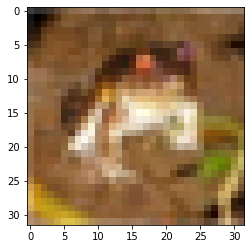

In [10]:
plt.imshow(train_loader.dataset.data[0].reshape(32,32,3))
plt.show()

6


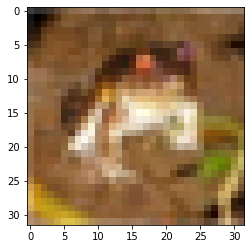

In [11]:
data_1 = train_loader.dataset.data[0]
target_1 = train_loader.dataset.targets[0]
print(target_1)
plt.imshow(data_1)
plt.show()

6


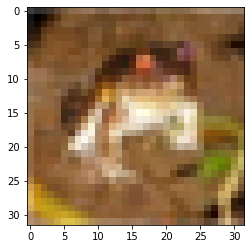

In [12]:
print(train_loader.dataset.targets[0])
plt.imshow(train_loader.dataset.data[0])
plt.show()

6


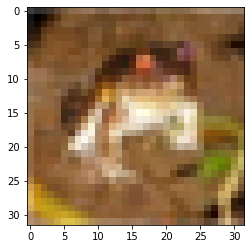

9


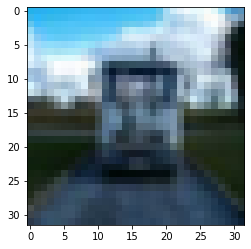

1


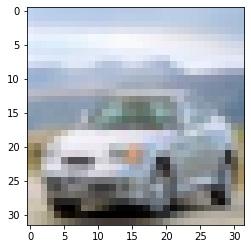

1


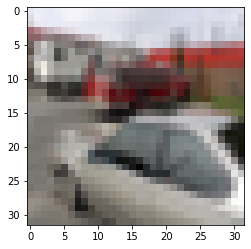

In [13]:
from itertools import chain
concatenated = chain(range(1), range(49997,50000 ))
for i in concatenated:
    plt.imshow(train_loader.dataset.data[i].reshape(32,32,3))
    print (train_loader.dataset.targets[i])
    plt.show()

### Training Parameter Settings

In [14]:
OUT_DIR = 'cox_out/'
NUM_WORKERS = 16
BATCH_SIZE = 512

In [ ]:
out_store = cox.store.Store(OUT_DIR)

In [16]:
train_kwargs = {
    'out_dir': "train_out",
    'adv_train': 1,
    'constraint': '2',
    'eps': 0.5,
    'attack_lr': 1.5,
    'attack_steps': 20,
    'epochs' : 110
}

In [ ]:
train_args = Parameters(train_kwargs)

# Fill whatever parameters are missing from the defaults
train_args = defaultsNew.check_and_fill_args(train_args,
                        defaultsNew.TRAINING_ARGS, DatasetsNew.MNIST)
train_args = defaultsNew.check_and_fill_args(train_args,
                        defaultsNew.PGD_ARGS, DatasetsNew.MNIST)

print(train_args)


### Train robust model

In [ ]:
train.train_model(train_args, m, (train_loader, val_loader), store=out_store)

In [ ]:
print("out_store: ", out_store)